# Dataroom data observation
We use a filtered Dataset which is reduced to 1400 (from 8900) rows with data quality that is acceptable in order to compare start ups among each other. The knowledge gained from this observation can possibly be used when making  investment decisions on new startup prospects.

The original dataset was filtered using the following criteria:
``` javascript
df['FUNDING UP UNTIL VALUATION DATE'] > 0) & (df["INDUSTRIES"].notnull())
    & (df["FUNDING FROM EARLY STAGES"] > 0) & (df["VALUATION AVG"].notnull()) & (df["REVENUE MODEL"].notnull()) & (df['HQ CITY'].notnull())]
```


## Splitting the data

The remaining start ups are split into two catgegories, which will be compared against each other.
Successful start ups are defined by a valuation to funding ratio which is greater than 30.
normal count: 1110
successful count: 297

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv("filtered.csv")

for column in df:
    if df[column].dtype == "bool":
        df[column] = df[column].astype(int)

#n= 297
successful = df[(df["VALUATION TO FUNDING RATIO"] > 30)
                 & (df["FUNDING UP UNTIL VALUATION DATE"] > 0)]
  
#n = 1110
normal = df[df["VALUATION TO FUNDING RATIO"] <= 30]




## 1. Revenue Models
Lets see if the Revenue Models are differently distributed among the more successful Startups


Manufactoring rate increases from 30 to 40% for more successful Start Ups

In [4]:
successful_manufacturing = successful["REVENUE MODEL MANUFACTURING"].value_counts(
)[1] / successful["REVENUE MODEL MANUFACTURING"].value_counts(
).sum()





In [5]:
normal_manufacturing = normal["REVENUE MODEL MANUFACTURING"].value_counts(
)[1] / normal["REVENUE MODEL MANUFACTURING"].value_counts(
).sum()


8% Less SAAS for more successful Start Ups

In [6]:
successful_saas= successful["REVENUE MODEL SAAS"].value_counts(
)[1] / successful["REVENUE MODEL SAAS"].value_counts(
).sum()


In [7]:
normal_saas= normal["REVENUE MODEL SAAS"].value_counts(
)[1] / normal["REVENUE MODEL SAAS"].value_counts(
).sum()



7% less Ecommerce for more successful Start Ups

In [8]:
successful_ecommerce =successful["REVENUE MODEL MARKETPLACE & ECOMMERCE"].value_counts(
)[1] / successful["REVENUE MODEL MARKETPLACE & ECOMMERCE"].value_counts(
).sum()


In [9]:
normal_ecommerce=normal["REVENUE MODEL MARKETPLACE & ECOMMERCE"].value_counts(
)[1] / normal["REVENUE MODEL MARKETPLACE & ECOMMERCE"].value_counts(
).sum()


In [10]:
revenue_model_data = [["MANUFACTORING", "Normal Startups", normal_manufacturing], 
                      ["MANUFACTORING", "Successful Startups", successful_manufacturing],
                      ["SAAS", "Normal Startups", normal_saas],
                      ["SAAS", "Successful Startups", successful_saas],
                      ["ECOMMERCE", "Normal Startups", normal_ecommerce],
                      ["ECOMMERCE", "Successful Startups", successful_ecommerce], ]


revenue_model_data=pd.DataFrame(revenue_model_data, columns=[
                               'REVENUE TYPE', 'CATEGORY', 'Percentage'])



## Revenue Model Plot

Since there are differences among the revenue models with a tendency towards more manufacturing among successful start ups, lets create a plot showing this tendency

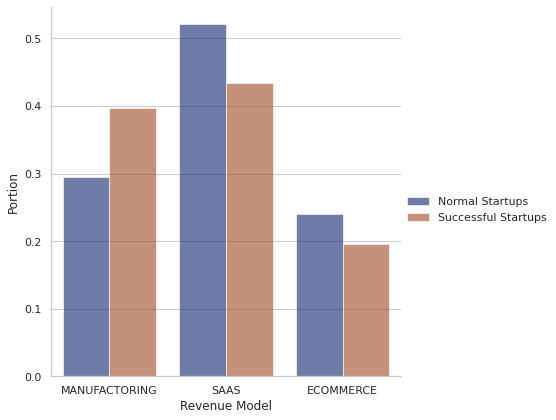

In [11]:


import seaborn as sns
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=revenue_model_data, kind="bar",
    x="REVENUE TYPE", y="Percentage", hue="CATEGORY",
    palette="dark", alpha=.6, height=6
)

g.set_axis_labels("Revenue Model", "Portion")
g.legend.set_title("")
# Draw a nested barplot by species and sex



## 2. Big Cities

Portion of the big cities Stockholm, Copenhagen, Helsinki, Oslo and Gothenburg doesn't change for more successful start ups

In [12]:
successful["HQ CITY"].value_counts()[
    :4].sum()/successful[["HQ CITY"]].size



0.5589225589225589

In [13]:
normal["HQ CITY"].value_counts()[
    :4].sum()/normal[["HQ CITY"]].size




0.5567567567567567

## 3. Industries

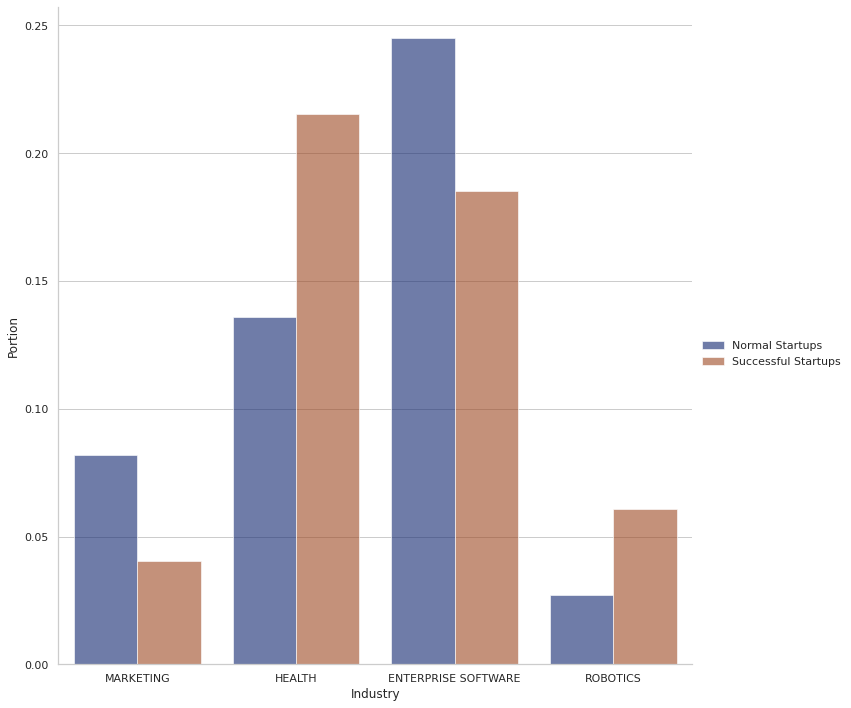

In [14]:
data_indutries = []

for column in df:
    if column.startswith("IS_"):
        portion_success = successful[column].mean()
        portion_normal = normal[column].mean()
        count_success = successful[column].sum()
        count_normal = normal[column].sum()
        data_indutries.append([column.split("_")[1],"Normal Startups",portion_normal,count_normal])
        data_indutries.append([column.split("_")[1], "Successful Startups", portion_success, count_success])
      

sns.set_theme(style="whitegrid")

data_indutries = pd.DataFrame(data_indutries, columns=[
    'Industry', 'Category', 'Portion', 'Count'])
data_indutries = data_indutries[data_indutries["Industry"].isin([
    "MARKETING", "HEALTH", "ENTERPRISE SOFTWARE", "ROBOTICS"])]
g = sns.catplot(
    data=data_indutries[:10], kind="bar",
    x="Industry", y="Portion", hue="Category",
    palette="dark", alpha=.6, height=10
)

g.set_axis_labels("Industry", "Portion")
g.legend.set_title("")


In [15]:
normal["IS_HEALTH_INDUSTRY"].value_counts()[1]/normal["IS_HEALTH_INDUSTRY"].value_counts().sum()


0.13603603603603603